# IMPORT LIBRARIES

In [70]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import cufflinks
%matplotlib inline

### CREATE TIME LIMITS TO EXTRACT THE STOCKS INFORMATION

In [40]:
start = datetime.datetime(2006,1,1)
end = datetime.datetime(2016,1,1)

### CODE TO EXTRACT THE STOCK INFORMATION FROM YAHOO

In [41]:
BAC = data.DataReader ("BAC", "yahoo", start, end) #Bank of America
C = data.DataReader ("C", "yahoo", start, end) #Citi
GS = data.DataReader ("GS", "yahoo", start, end) #Goldman
JPM = data.DataReader ("JPM", "yahoo", start, end) #JPMorgan
MS = data.DataReader ("MS", "yahoo", start, end) #Morgan Stanley
WFC = data.DataReader ("WFC", "yahoo", start, end) #Wells Fargo

In [42]:
banks = ["BAC", "C", "GS", "JPM", "MS", "WFC"]

# GET TOGETHER ALL STOCKS INFO

In [43]:
bankStock = pd.concat([BAC,C, GS, JPM, MS, WFC], axis = 1, keys = banks)
bankStock.columns.names = ["Bank Name", "Stock Info"]
bankStock.head()

Bank Name         BAC                                                          \
Stock Info       High        Low       Open      Close      Volume  Adj Close   
Date                                                                            
2006-01-03  47.180000  46.150002  46.919998  47.080002  16296700.0  33.364243   
2006-01-04  47.240002  46.450001  47.000000  46.580002  17757900.0  33.009911   
2006-01-05  46.830002  46.320000  46.580002  46.639999  14970700.0  33.052425   
2006-01-06  46.910000  46.349998  46.799999  46.570000  12599800.0  33.002811   
2006-01-09  46.970001  46.360001  46.720001  46.599998  15619400.0  33.024071   

Bank Name            C                                      ...         MS  \
Stock Info        High         Low        Open       Close  ...       Open   
Date                                                        ...              
2006-01-03  493.799988  481.100006  490.000000  492.899994  ...  57.169998   
2006-01-04  491.000000  483.500000  488.600006  483.799988  ...  58.700001   
2006-01-05  487.799988  484.000000  484.399994  486.200012  ...  58.549999   
2006-01-06  489.000000  482.000000  488.799988  486.200012  ...  58.770000   
2006-01-09  487.399994  483.000000  486.000000  483.899994  ...  58.630001   

Bank Name                                          WFC                        \
Stock Info      Close     Volume  Adj Close       High        Low       Open   
Date                                                                           
2006-01-03  58.310001  5377000.0  34.886642  31.975000  31.195000  31.600000   
2006-01-04  58.349998  7977800.0  34.910583  31.820000  31.365000  31.799999   
2006-01-05  58.509998  5778000.0  35.006290  31.555000  31.309999  31.500000   
2006-01-06  58.570000  6889800.0  35.042206  31.775000  31.385000  31.580000   
2006-01-09  59.189999  4144500.0  35.413136  31.825001  31.555000  31.674999   

Bank Name                                     
Stock Info      Close      Volume  Adj Close  
Date                                          
2006-01-03  31.900000  11016400.0  20.104456  
2006-01-04  31.530001  10870000.0  19.871269  
2006-01-05  31.495001  10158000.0  19.849215  
2006-01-06  31.680000   8403800.0  19.965803  
2006-01-09  31.674999   5619600.0  19.962660  

[5 rows x 36 columns]

### GETTING THE MAX CLOSE BANK STOCK OF EVERY BANK

In [44]:
bankStock.xs(key="Close", axis = 1, level = "Stock Info").max()

Bank Name
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

## GETTING THE EARNINGS ON EVERY BANK STOCK

In [45]:
earnings = pd.DataFrame()

for bank in banks:
    earnings[bank + " Earnings"] = bankStock[bank]["Close"].pct_change()

earnings.head()

,BAC Earnings,C Earnings,GS Earnings,JPM Earnings,MS Earnings,WFC Earnings
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


# CREATING A REGRESSION PLOT MATRIX BASED ON EVERY COLUMN

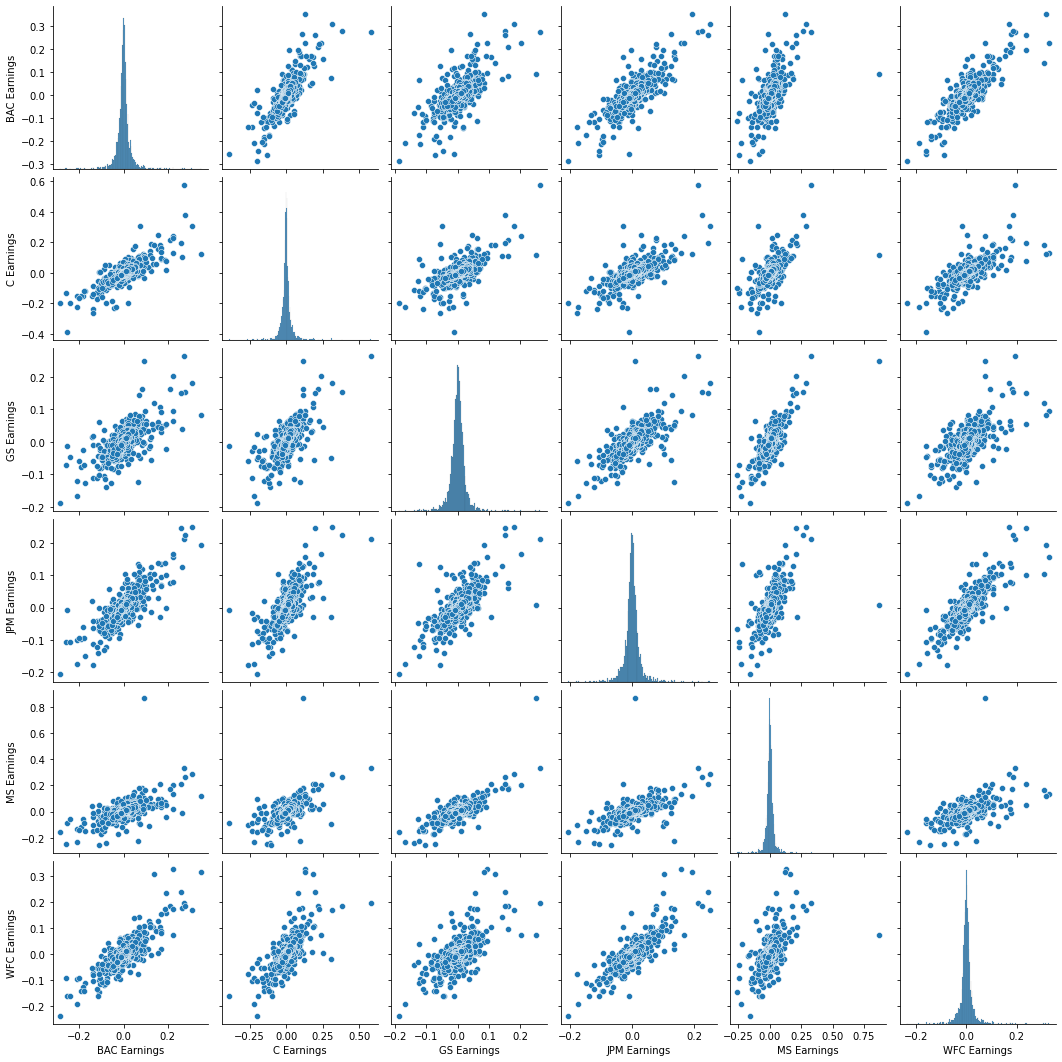

In [46]:
sns.pairplot(earnings[1:])
plt.show()

# GET THE INDEX LOCATION OF THE MINIMUM EARNINGS

In [49]:
earnings.idxmin()

BAC Earnings   2009-01-20
C Earnings     2009-02-27
GS Earnings    2009-01-20
JPM Earnings   2009-01-20
MS Earnings    2008-10-09
WFC Earnings   2009-01-20
dtype: datetime64[ns]

# GET THE INDEX LOCATION OF THE MAXIMUM EARNINGS

In [51]:
earnings.idxmax()

BAC Earnings   2009-04-09
C Earnings     2008-11-24
GS Earnings    2008-11-24
JPM Earnings   2009-01-21
MS Earnings    2008-10-13
WFC Earnings   2008-07-16
dtype: datetime64[ns]

# GET THE MEAN EARNINGS

In [53]:
earnings.std()

BAC Earnings    0.036647
C Earnings      0.038672
GS Earnings     0.025390
JPM Earnings    0.027667
MS Earnings     0.037819
WFC Earnings    0.030238
dtype: float64

# GET THE MEAN EARNINGS FROM A LIMIT DATES

In [58]:
earnings.loc["2015-01-01":"2015-12-31"].std()

BAC Earnings    0.016163
C Earnings      0.015289
GS Earnings     0.014046
JPM Earnings    0.014017
MS Earnings     0.016249
WFC Earnings    0.012591
dtype: float64

### CODED A HISTOGRAM TO SEE THE DISTRIBUTION OF THE EARNINGS FROM A LIMIT DATES

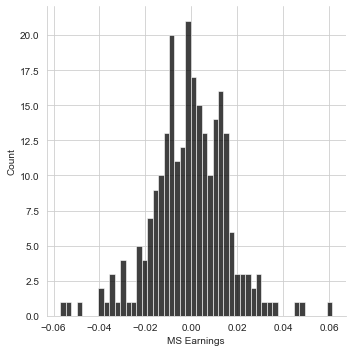

In [90]:
sns.displot(earnings.loc["2015-01-01":"2015-12-31"]["MS Earnings"], color= "black", bins = 50)
plt.show()

### CODED A HISTOGRAM TO SEE THE DISTRIBUTION OF THE EARNINGS FROM A LIMIT DATES

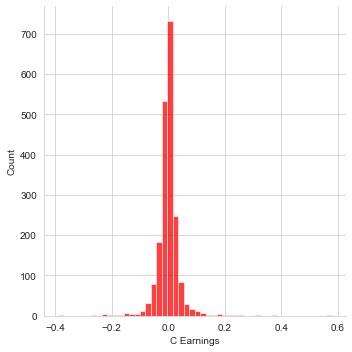

In [92]:
sns.displot(earnings.loc["2008-01-01":"2018-12-31"]["C Earnings"], color= "red", bins = 50)
plt.show()

In [62]:
sns.set_style("whitegrid")
%matplotlib inline

## VISUAL WITH A FOR LOOP SHOWING ALL BANKS CLOSES IN A TIME FRAME

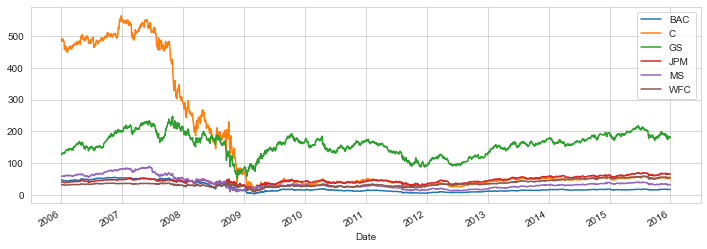

In [94]:
for bank in banks:
    bankStock[bank]["Close"].plot(label = bank, figsize=(12,4))
plt.legend()
plt.show()

## VISUAL WITH THE .xs FUNCTION SHOWING ALL BANKS CLOSES IN A TIME FRAME

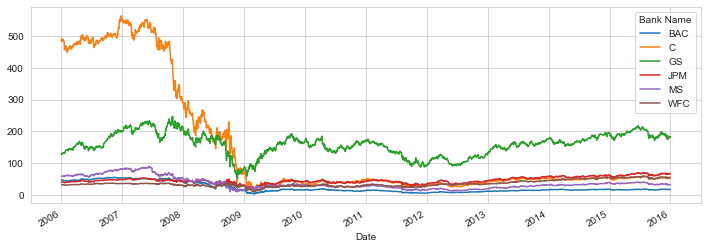

In [97]:
bankStock.xs(key = "Close", axis=1, level = "Stock Info").plot(figsize=(12,4))
plt.show()

### VISUAL WITH TWO PLOTS, ONE IS THE 30 DAYS MEAN AND THE OTHER THE PRICE CLOSE RECORD

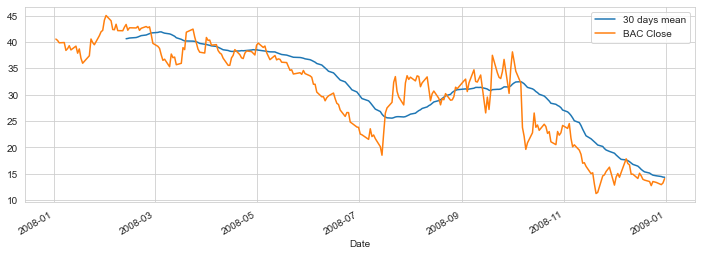

In [98]:
BAC["Close"].loc["2008-01-01":"2009-01-01"].rolling(window=30).mean().plot(label = "30 days mean", figsize=(12,4))
BAC["Close"].loc["2008-01-01":"2009-01-01"].plot(label ="BAC Close")
plt.legend()

# CORRELATION HEATMAP

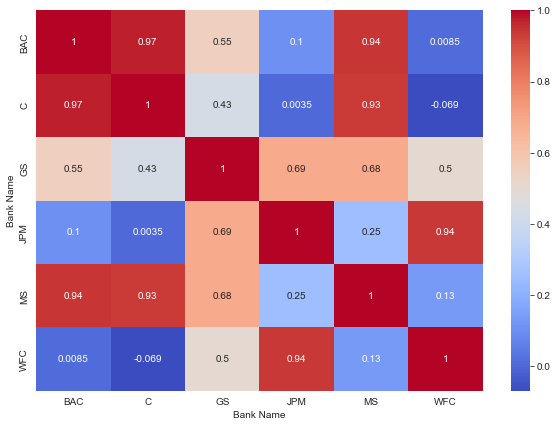

In [109]:
plt.figure( figsize=(10,7))
sns.heatmap(bankStock.xs(key = "Close", axis = 1, level = "Stock Info").corr(), 
            annot = True, cmap = "coolwarm")
plt.show()

# CORRELATION CLUSTERMAP

<Figure size 576x360 with 0 Axes>

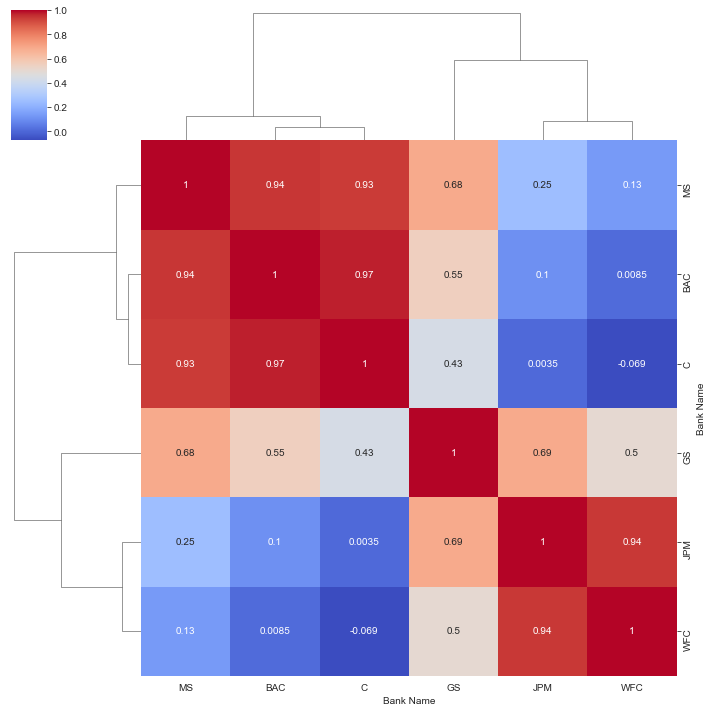

In [110]:
plt.figure( figsize=(8,5))
sns.clustermap(bankStock.xs(key = "Close", axis = 1, level = "Stock Info").corr(), 
               annot = True, cmap = "coolwarm")
plt.show()